In [3]:
import sys
sys.path.append('/Users/danielhug/neuraldragon/.venv/lib/python3.10/site-packages')
sys.path.append("/Users/danielhug/neuraldragon/gitensor/BabyDragon")

In [5]:
from babydragon.memory.indexes.memory_index import MemoryIndex
import pandas as pd

In [11]:
#!git clone https://github.com/SLAB-NLP/Akk.git
#Akk/data/eng_from_website.jsonl

Found cached dataset parquet (/Users/danielhug/.cache/huggingface/datasets/OpenAssistant___parquet/OpenAssistant--oasst1-2960c57d7e52ab15/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
100%|██████████| 2/2 [00:00<00:00, 182.31it/s]


In [6]:
akk_data = "/Users/danielhug/neuraldragon/gitensor/BabyDragon/notebooks/storage/eng_from_website.jsonl"

In [8]:
import json
            
with open(akk_data, 'r') as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)


In [10]:
df.columns

Index(['id_text', 'sub_project_name', 'raw_text'], dtype='object')

In [11]:
df

,id_text,sub_project_name,raw_text
0,P223388,saa03,May anyone trust in whomever he trusts; as for...
1,P223391,saa03,
2,P224378,saa19,[Your servant NN]: I would [gladly] die [for t...
3,P224379,saa19,"[To] the king, [my] lor[d]: your servant [NN. ..."
4,P224380,saa19,"T[o the king, my lord]: yo[ur] servant [NN]. G..."
...,...,...,...
41326,X000009,obmc,
41327,X000010,obmc,
41328,X000011,obmc,... Ilum-īde received (1 gur of barley) from I...
41329,X000012,obmc,"15 1/2 shekels of silver, with an interest of ..."


In [12]:
values = df['raw_text'].values


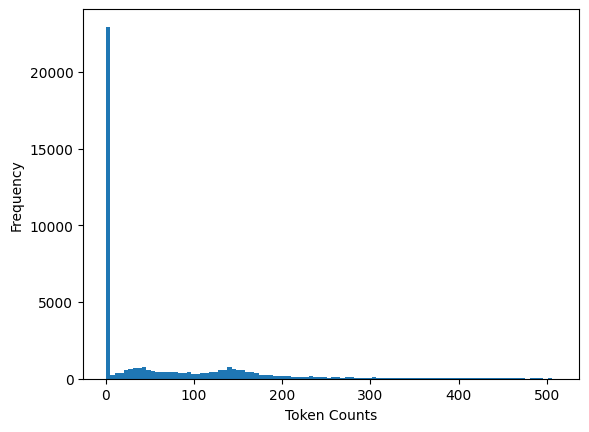

In [20]:
import tiktoken
import matplotlib.pyplot as plt

tokenizer = tiktoken.encoding_for_model("gpt-3.5-turbo")
token_counts = []
filtered_values = []
for val in values:
    tokens = tokenizer.encode(val, disallowed_special=())
    num_tokens = len(tokens)
    if num_tokens < 512:
        filtered_values.append(val)
        token_counts.append(num_tokens)
    else:
        #break into chunks by token count
        num_chunks = num_tokens // 500
        for i in range(num_chunks):
            sub_val = val[i*500:(i+1)*500]
            tokens = tokenizer.encode(sub_val, disallowed_special=())
            num_tokens = len(tokens)
            if num_tokens < 512:
                filtered_values.append(sub_val)
            token_counts.append(num_tokens)
            


    

plt.hist(token_counts, bins=100)
plt.xlabel('Token Counts')
plt.ylabel('Frequency')
plt.show()


In [22]:
max(token_counts)

511

In [23]:
filtered_values[0]

'May anyone trust in whomever he trusts; as for us, we trust in Nabû, we are devoted to Tašmetu! What is ours is ours; Nabû is our lord, Tašmetu is the mountain of our trust! Ditto. Say to her, to her of the wall, to her of the wall, to Tašmetu: "Save (us), sit down in the cella!" Let (the scent of) holy juniper fill the sanctuary! Ditto. The shade of the cedar, the shade of the cedar, the shade of the cedar, the king\'s shelter! The shade of the cypress (is for) his magnates! The shade of a sprig'

In [26]:
from babydragon.models.embedders.cohere import CohereEmbedder
cohere_embedder = CohereEmbedder()

In [27]:
cohere_embedder.get_embedding_size()

768

In [24]:
import cohere
co = cohere.Client('LeohkffIg5ucAxbMSfiCIhZ0RL9M2uuw0GVb99ZN')
# batch list into lists of 1000 and merge embeddings into a single ist
embedding_set = []
for i in range(0, len(filtered_values), 1000):
    print(i)
    if i + 1000 < len(filtered_values):
        response = co.embed(texts= filtered_values[i:i+1000],model='multilingual-22-12')
    else:
        response = co.embed(texts= filtered_values[i:],model='multilingual-22-12')
    print(len(response.embeddings))
    embeddings = response.embeddings
    embedding_set.extend(embeddings)

0
1000
1000
1000
2000
1000
3000
1000
4000
1000
5000
1000
6000
1000
7000
1000
8000
1000
9000
1000
10000
1000
11000
1000
12000
1000
13000
1000
14000
1000
15000
1000
16000
1000
17000
1000
18000
1000
19000
1000
20000
1000
21000
1000
22000
1000
23000
1000
24000
1000
25000
1000
26000
1000
27000
1000
28000
1000
29000
1000
30000
1000
31000
1000
32000
1000
33000
1000
34000
1000
35000
1000
36000
1000
37000
1000
38000
1000
39000
1000
40000
1000
41000
1000
42000
1000
43000
608


In [28]:
akk_index = MemoryIndex(values=filtered_values, embeddings=embedding_set, name='akk_cohere_index', embedder=CohereEmbedder)

Creating a new index from a list of embeddings and values
10284  values in the index
10284  embeddings in the index


In [50]:
akk_index.faiss_query("Ziggurats and temples")

(["For Enlil, the king of all lands, his master, Amar-Suena, whose name was proclaimed by Enlil in Nibru, the steadfast supporter of Enlil's temple, the powerful man, king of Urim, king of the four quarters, built the Kura-igi-ĝ̃al, the ziggurat temple, his beloved temple.",
  'In [the city Tarbiṣu ...]. As for its wall [... for] the god Nergal, my lord, [...] I ... [...]. The temple of the goddess Ištar my mistress [in the city Talmuššu] I restored. [Her] ziggurrat, the holy shrine, the peaceful abode, I [(re)constructed] inside the city Talmuššu for the goddess Ištar, mistress of the city Talmuššu. Egašankalamma, the temple of the goddess Ištar, mistress of the city Arbela, my mistress, and her ziggurrat I (re)built. The great ziggurrat I (re)built for the god Aššur my lord inside my city Aššur. The temple of the god Adad of the city Kaḫat and the god Adad of the city Isani, my lords, I (re)built. I made those cult centers (and) shrines better than previously, (re)built them from top

In [47]:
akkadian_queries = [
    "Tale of the ascension of Sargon the Great and birth of the mighty Akkad",
    "Inscription of the governance and rule in the vast Akkad",
    "Epic of the grandeur in artistry and customs across the Akkadian realm",
    "Cuneiform tablet detailing the commerce and exchange of goods in Akkad",
    "Hymns and myths dedicated to the divine pantheon of the Akkadian Empire",
    "Chronicle of the warriors and battles fought under the Akkadian banner",
    "The lament for the decline and eventual fall of our esteemed Akkad",
    "The legacy and enduring impact of Akkad, as remembered by the river Euphrates"
]


for q in akkadian_queries:
    print(q)
    print(akk_index.faiss_query(q, k=3))
     

Tale of the ascension of Sargon the Great and birth of the mighty Akkad
(['ted] me with shepherding Assyria. At the beginning of [my] kingship, in my first year, when I sat in greatness on (my) royal throne, [go]od signs [were] established for me; [in] heaven and on ear[th, he (the god Marduk) constantly sent me his] omen(s). The angry [gods] were recon[ciled] (and) they repeatedly discl[os]ed favorable signs concerning the (re)buil[di]ng of Bab[yl]on (and) the renovation of E[sag]il. Bright Jupiter, the giver of decisions on Akkad, came near in Simānu (III) and stood ', 'The palace of Esarhaddon, great king, mighty king, king of the world, king of Assyria, governor of Babylon, king of Sumer and Akkad, (i 5) son of Sennacherib, king of Assyria, descendant of Sargon (II), king of Assyria, the king who with the help of the gods Aššur, Sîn, Šamaš, Nabû, Marduk, Ištar of Nineveh, (and) Ištar of Arbela, (i 10) the great gods, his lords, marched from the rising sun to the setting sun and had

In [16]:
from babydragon.chat.memory_chat import FifoChat


In [18]:
chatbot = FifoChat(model= "command", index_dict = {"akk_cohere_index":akk_index}, name="babyd_chatbot", max_index_memory = 2500, max_output_tokens= 400)

Index is available so using index prompts


In [19]:
chatbot.reply("What is the meaning of life?")

Trying to call Cohere API... using model: command


#### Question: 
 What is the meaning of life?

 #### Anwser: 
 
According to Hinduism, the meaning of life is to realize that one's soul is identical to the supreme soul, that the supreme soul is present in everything and everyone, all life is interconnected and there is oneness in all life.

"\nAccording to Hinduism, the meaning of life is to realize that one's soul is identical to the supreme soul, that the supreme soul is present in everything and everyone, all life is interconnected and there is oneness in all life."